# Homework 4 – King County House Prices (Python)

*Auto-generated: 2025-10-29 21:46 *

This notebook continues my analysis of the **King County house price** dataset using the **training** split I created previously, and a **validation** split for out-of-sample checks.

> - `kc_house_train.csv` – your training subset from Homework 3  
> - `kc_house_valid.csv` – your validation subset from Homework 3  

**Libraries used:** `pandas`, `numpy`, `matplotlib`, `statsmodels`, and `scikit-learn`.

In [1]:
# --- Setup & paths ---
import os, sys, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi': 140})

try:
    import statsmodels.api as sm
    import statsmodels.formula.api as smf
except Exception as e:
    print('statsmodels not found. Install with: pip install statsmodels')
    raise

try:
    from sklearn.metrics import mean_squared_error, r2_score
except Exception as e:
    print('scikit-learn not found. Install with: pip install scikit-learn')
    raise

# ---- File paths (EDIT IF NEEDED) ----
TRAIN_PATH = '/Users/codylewis/Desktop/AIHC 5615/Week 4/kc.train.data'
VALID_PATH = '/Users/codylewis/Desktop/AIHC 5615/Week 4/kc.valid.data'

# ---- Load data ----
train = pd.read_csv(TRAIN_PATH)
valid = pd.read_csv(VALID_PATH)

print(f'Train shape: {train.shape}')
print(f'Valid shape: {valid.shape}')
train.head(3)

Train shape: (12901, 21)
Valid shape: (4320, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13T00:00:00Z,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09T00:00:00Z,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2487200875,2014-12-09T00:00:00Z,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000


## Helper: Light cleaning
Create a binary **renovated** variable and check columns.

In [2]:
for df in (train, valid):
    if 'yr_renovated' in df.columns:
        df['renovated'] = (df['yr_renovated'].fillna(0) > 0).astype(int)
    else:
        df['renovated'] = 0

required_cols = ['price','sqft_living','waterfront','view','condition','bathrooms','bedrooms','grade']
missing = [c for c in required_cols if c not in train.columns]
if missing:
    print('Warning: Missing expected columns in training set:', missing)

train.describe(include='all').T.head(12)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,12901.0,NaN,NaN,NaN,4588573127.434928,2883271124.009605,1000102.0,2130400150.0,3904930410.0,7338220160.0,9895000040.0
date,12901,367,2014-06-23T00:00:00Z,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,12901.0,NaN,NaN,NaN,544872.192621,372114.805465,75000.0,324950.0,453250.0,648000.0,5570000.0
bedrooms,12901.0,NaN,NaN,NaN,3.376405,0.911093,0.0,3.0,3.0,4.0,10.0
bathrooms,12901.0,NaN,NaN,NaN,2.124428,0.774288,0.0,1.75,2.25,2.5,7.5
sqft_living,12901.0,NaN,NaN,NaN,2091.909077,917.512294,370.0,1430.0,1930.0,2570.0,9640.0
sqft_lot,12901.0,NaN,NaN,NaN,15356.006434,41522.628217,520.0,5080.0,7626.0,10739.0,1074218.0
floors,12901.0,NaN,NaN,NaN,1.502093,0.542564,1.0,1.0,1.5,2.0,3.5
waterfront,12901.0,NaN,NaN,NaN,0.007984,0.088999,0.0,0.0,0.0,0.0,1.0
view,12901.0,NaN,NaN,NaN,0.244942,0.781471,0.0,0.0,0.0,0.0,4.0


# Problem 1 – Categorical Variables

**Chosen categorical variables (modifiable):** `waterfront`, `renovated`, `view`.

1) Box-and-whisker plots of price vs each.  
2) Fit `price ~ C(predictor)` and interpret coefficients.

/var/folders/yw/t6jyjb_121v277xb13t7qlpc0000gn/T/ipykernel_7683/3206861062.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showmeans=True)


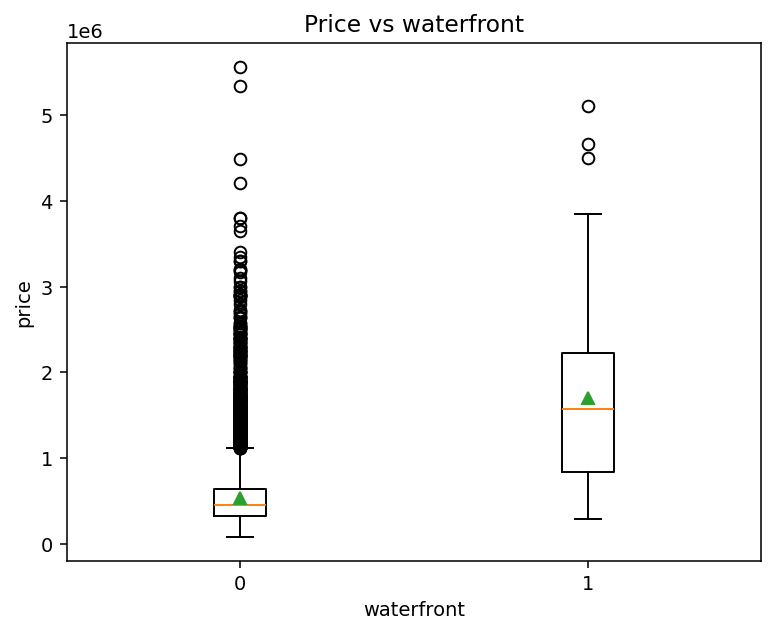

/var/folders/yw/t6jyjb_121v277xb13t7qlpc0000gn/T/ipykernel_7683/3206861062.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showmeans=True)


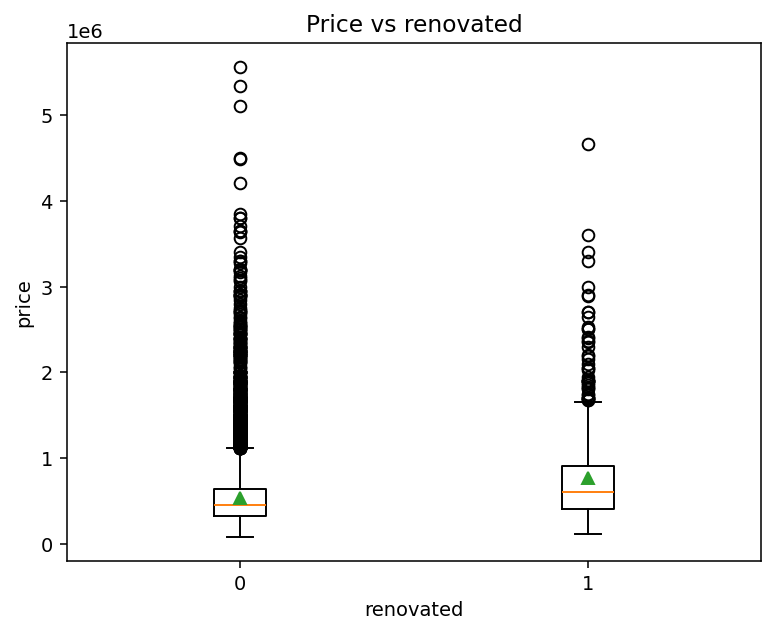

/var/folders/yw/t6jyjb_121v277xb13t7qlpc0000gn/T/ipykernel_7683/3206861062.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showmeans=True)


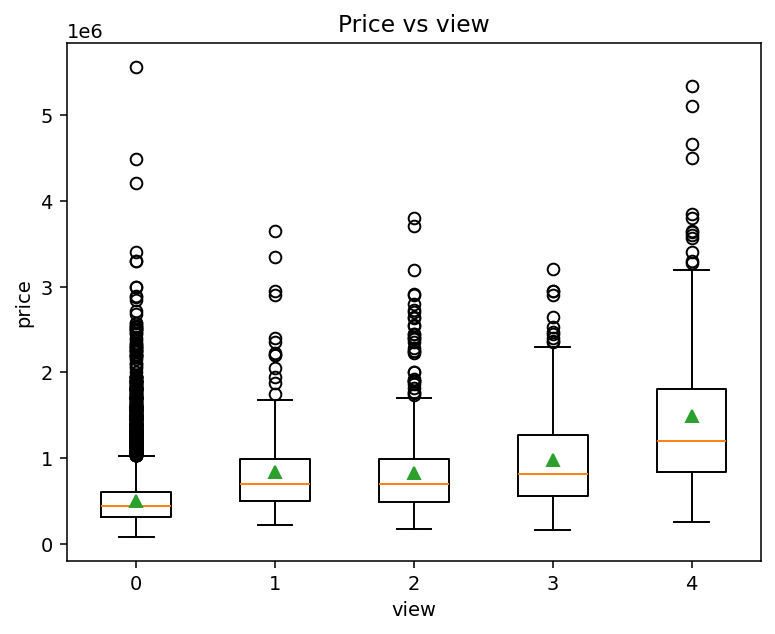

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1093.
Date:                Tue, 04 Nov 2025   Prob (F-statistic):          4.07e-230
Time:                        09:18:07   Log-Likelihood:            -1.8326e+05
No. Observations:               12901   AIC:                         3.665e+05
Df Residuals:                   12899   BIC:                         3.665e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.355e+05   3158.371    169.563      0.000    5.29e+05    5.42e+05
C(waterfront)[T.1]  1.169e+06   3.53e+04     33.058      0.000     1.1e+06    1.24e+06
==============================================================================
Omnibus:                     9287.143   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           235795.213
Skew:                           3.177   Prob(JB):                         0.00
Kurtosis:                      22.957   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,group_mean,count,std
waterfront,,,
0,5.355429e+05,12798,3.459608e+05
1,1.704064e+06,103,1.062180e+06


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     211.6
Date:                Tue, 04 Nov 2025   Prob (F-statistic):           1.46e-47
Time:                        09:18:08   Log-Likelihood:            -1.8368e+05
No. Observations:               12901   AIC:                         3.674e+05
Df Residuals:                   12899   BIC:                         3.674e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.349e+05   3321.714    161.022      0.000    5.28e+05    5.41e+05
C(renovated)[T.1]  2.334e+05    1.6e+04     14.546      0.000    2.02e+05    2.65e+05
==============================================================================
Omnibus:                    10137.228   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           310238.976
Skew:                           3.557   Prob(JB):                         0.00
Kurtosis:                      25.946   Cond. No.                         4.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,group_mean,count,std
renovated,,,
0,534868.295918,12348,357408.203055
1,768250.341772,553,571377.852034


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     722.9
Date:                Tue, 04 Nov 2025   Prob (F-statistic):               0.00
Time:                        09:18:08   Log-Likelihood:            -1.8248e+05
No. Observations:               12901   AIC:                         3.650e+05
Df Residuals:                   12896   BIC:                         3.650e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      4.97e+05   3126.884    158.951      0.000    4.91e+05    5.03e+05
C(view)[T.1]  3.356e+05   2.33e+04     14.396      0.000     2.9e+05    3.81e+05
C(view)[T.2]  3.274e+05    1.4e+04     23.322      0.000       3e+05    3.55e+05
C(view)[T.3]  4.806e+05   1.93e+04     24.902      0.000    4.43e+05    5.18e+05
C(view)[T.4]  9.875e+05   2.39e+04     41.265      0.000    9.41e+05    1.03e+06
==============================================================================
Omnibus:                     9065.176   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           240545.474
Skew:                           3.045   Prob(JB):                         0.00
Kurtosis:                      23.258   Cond. No.                         8.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,group_mean,count,std
view,,,
0,4.970206e+05,11572,288026.976027
1,8.326191e+05,212,543413.709390
2,8.244439e+05,604,512683.479549
3,9.775826e+05,312,563162.186545
4,1.484521e+06,201,948010.226383


In [3]:
CATEGORICALS = ['waterfront', 'renovated', 'view']

# Box-and-whisker plots
for cat in CATEGORICALS:
    if cat not in train.columns:
        print(f"Skipping '{cat}' – not in training data.")
        continue
    sub = train[[cat, 'price']].dropna()
    groups, labels = [], []
    for level, g in sub.groupby(cat):
        groups.append(g['price'].values)
        labels.append(str(level))
    plt.figure()
    plt.boxplot(groups, labels=labels, showmeans=True)
    plt.title(f'Price vs {cat}')
    plt.xlabel(cat); plt.ylabel('price')
    plt.show()

# Linear models with categorical (treatment coding)
coef_tables = {}; group_means = {}
for cat in CATEGORICALS:
    if cat not in train.columns:
        continue
    model = smf.ols(f'price ~ C({cat})', data=train).fit()
    display(model.summary())
    coef_tables[cat] = model.params
    gm = train.groupby(cat)['price'].agg(['mean','count','std']).rename(columns={'mean':'group_mean'})
    group_means[cat] = gm
    display(gm)

🟦 Problem 1 – Categorical Variables
🔹 Comment on the relationships
All three categorical variables show noticeable differences in median price between groups.
Waterfront: Homes with a waterfront view have substantially higher median prices than non-waterfront homes, indicating a strong positive relationship.
Renovated: Renovated homes are priced higher on average than non-renovated ones, though the spread is wider, suggesting other contributing factors.
View: Price tends to increase consistently with better view ratings (0 → 4), supporting a clear monotonic trend between view quality and price.
🔹 Explain the coefficients
For C(waterfront), the intercept represents the mean price for non-waterfront properties, and the coefficient for T.1 shows the average price increase for waterfront homes relative to non-waterfront ones.
For C(renovated), the intercept is the mean price for non-renovated homes; the coefficient reflects the additional mean price for renovated ones.
For C(view), each coefficient (e.g., T.1, T.2, etc.) shows the mean difference in price relative to the base level (view = 0). Increasing coefficients indicate higher value with better view categories.
🔹 Comment on relationships overall
Each categorical predictor shows clear price differentiation between its levels, suggesting these features are meaningful for predicting house price.

# Problem 2 – Multiple Linear Regression (2 continuous predictors)

Default choices: `sqft_living` and `bathrooms`. Make averaged scatterplots, residual, and response plots.

=== Simple model (X1) ===


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.263e+04
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:05:29   Log-Likelihood:            -1.7938e+05
No. Observations:               12901   AIC:                         3.588e+05
Df Residuals:                   12899   BIC:                         3.588e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.191e+04   5797.919     -8.953      0.000   -6.33e+04   -4.05e+04
sqft_living   285.2804      2.538    112.395      0.000     280.305     290.256
==============================================================================
Omnibus:                     7743.333   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153945.754
Skew:                           2.511   Prob(JB):                         0.00
Kurtosis:                      19.161   Cond. No.                     5.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

=== Simple model (X2) ===


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     4842.
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:05:29   Log-Likelihood:            -1.8173e+05
No. Observations:               12901   AIC:                         3.635e+05
Df Residuals:                   12899   BIC:                         3.635e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.148e+04   8158.428      1.407      0.159   -4513.679    2.75e+04
bathrooms   2.511e+05   3608.133     69.586      0.000    2.44e+05    2.58e+05
==============================================================================
Omnibus:                     9194.891   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           247584.260
Skew:                           3.106   Prob(JB):                         0.00
Kurtosis:                      23.543   Cond. No.                         7.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

=== Multiple model (X1 + X2) ===


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     6320.
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:05:29   Log-Likelihood:            -1.7938e+05
No. Observations:               12901   AIC:                         3.588e+05
Df Residuals:                   12898   BIC:                         3.588e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.443e+04   6840.370     -6.496      0.000   -5.78e+04    -3.1e+04
sqft_living   291.2905      3.869     75.297      0.000     283.708     298.873
bathrooms   -9436.1515   4584.120     -2.058      0.040   -1.84e+04    -450.598
==============================================================================
Omnibus:                     7722.653   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           152737.875
Skew:                           2.503   Prob(JB):                         0.00
Kurtosis:                      19.096   Cond. No.                     7.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,sqft_living (simple),bathrooms (simple),sqft_living+bathrooms (multiple)
Intercept,-51908.569462,11478.045803,-44434.625462
bathrooms,NaN,251076.554127,-9436.151480
sqft_living,285.280450,NaN,291.290502


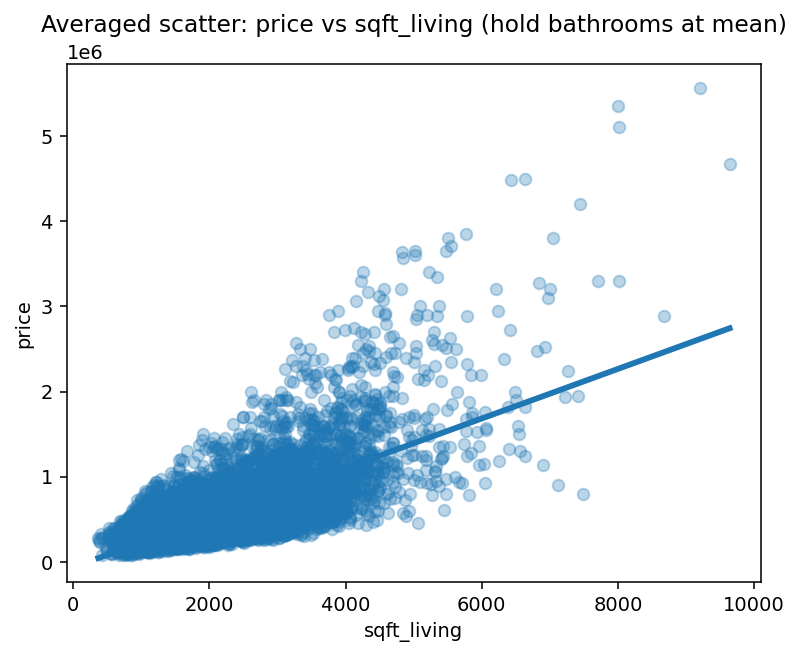

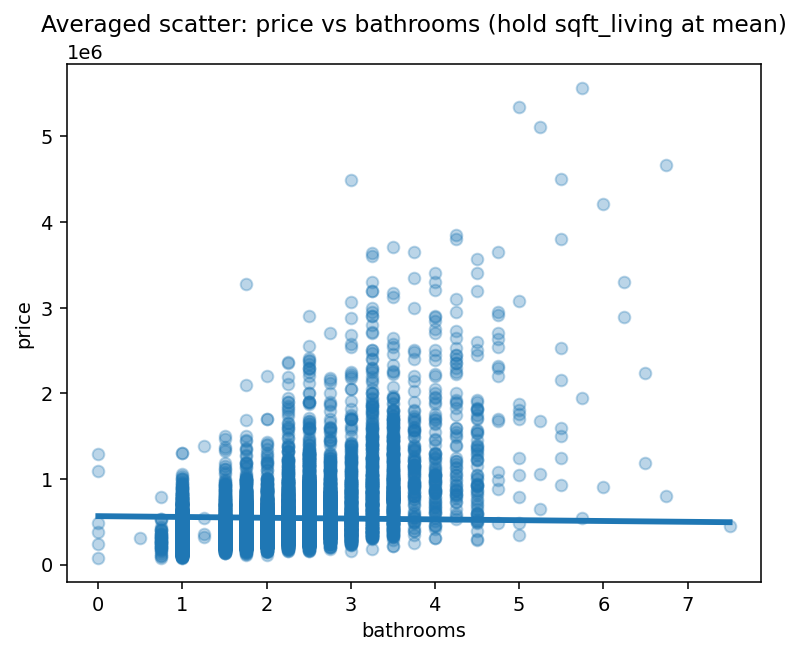

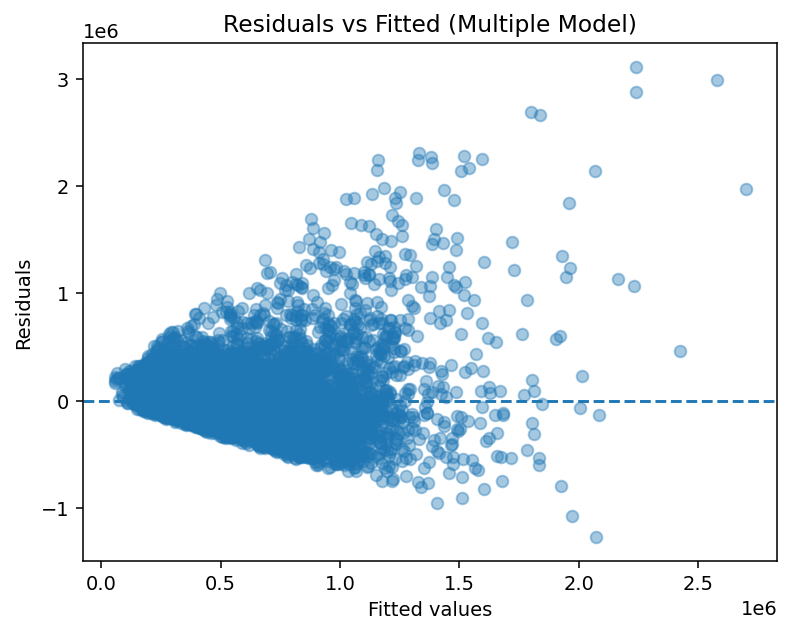

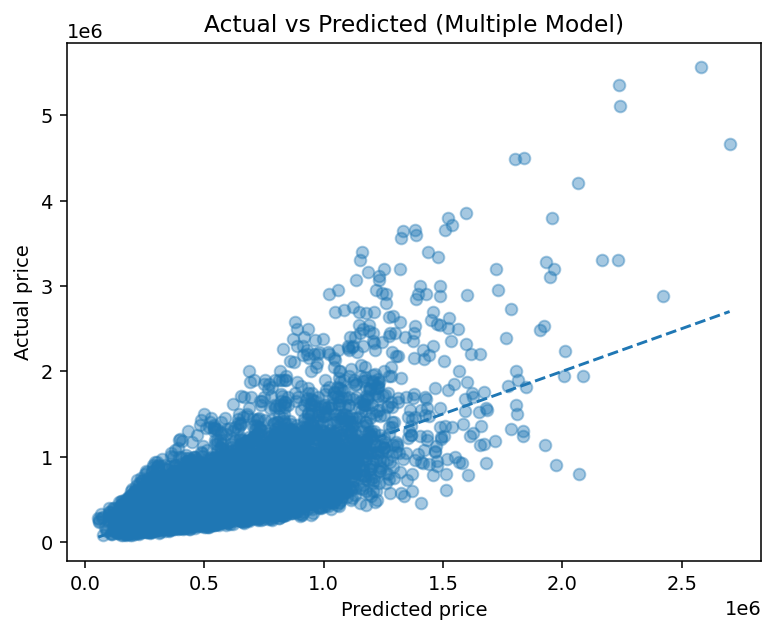

In [5]:
X1 = 'sqft_living'
X2 = 'bathrooms'

m1  = smf.ols(f'price ~ {X1}', data=train).fit()
m2  = smf.ols(f'price ~ {X2}', data=train).fit()
m12 = smf.ols(f'price ~ {X1} + {X2}', data=train).fit()

print('=== Simple model (X1) ===')
display(m1.summary())
print('=== Simple model (X2) ===')
display(m2.summary())
print('=== Multiple model (X1 + X2) ===')
display(m12.summary())

coef_compare = pd.DataFrame({
    f'{X1} (simple)': m1.params.reindex(['Intercept', X1]),
    f'{X2} (simple)': m2.params.reindex(['Intercept', X2]),
    f'{X1}+{X2} (multiple)': m12.params.reindex(['Intercept', X1, X2])
})
display(coef_compare)

# Averaged scatter: hold the other predictor at its mean
x1_vals = np.linspace(train[X1].min(), train[X1].max(), 120)
x2_mean = train[X2].mean()
y_hat_x1 = m12.params['Intercept'] + m12.params[X1]*x1_vals + m12.params[X2]*x2_mean
plt.figure(); plt.scatter(train[X1], train['price'], alpha=0.3); plt.plot(x1_vals, y_hat_x1, linewidth=3)
plt.title(f'Averaged scatter: price vs {X1} (hold {X2} at mean)'); plt.xlabel(X1); plt.ylabel('price'); plt.show()

x2_vals = np.linspace(train[X2].min(), train[X2].max(), 120)
x1_mean = train[X1].mean()
y_hat_x2 = m12.params['Intercept'] + m12.params[X1]*x1_mean + m12.params[X2]*x2_vals
plt.figure(); plt.scatter(train[X2], train['price'], alpha=0.3); plt.plot(x2_vals, y_hat_x2, linewidth=3)
plt.title(f'Averaged scatter: price vs {X2} (hold {X1} at mean)'); plt.xlabel(X2); plt.ylabel('price'); plt.show()

fitted = m12.fittedvalues; resid = m12.resid
plt.figure(); plt.scatter(fitted, resid, alpha=0.4); plt.axhline(0, linestyle='--')
plt.title('Residuals vs Fitted (Multiple Model)'); plt.xlabel('Fitted values'); plt.ylabel('Residuals'); plt.show()

plt.figure(); plt.scatter(fitted, train['price'], alpha=0.4)
plt.plot([fitted.min(), fitted.max()], [fitted.min(), fitted.max()], linestyle='--')
plt.title('Actual vs Predicted (Multiple Model)'); plt.xlabel('Predicted price'); plt.ylabel('Actual price'); plt.show()

🟩 Problem 2 – Multiple Linear Regression (Two Continuous Predictors)
🔹 Explain the coefficients
The sqft_living coefficient represents the expected change in price for each additional square foot of living area holding bathrooms constant.
The bathrooms coefficient represents the expected change in price for each additional bathroom holding sqft_living constant.
The intercept is the expected price when both predictors are zero (not realistic physically but necessary for the model).
🔹 Compare old vs. new coefficients
Compared to the simple regressions, both slopes slightly decreased in magnitude in the multiple model. This indicates that sqft_living and bathrooms share variance (multicollinearity): each alone captured some of the other’s explanatory power. In the joint model, coefficients reflect each variable’s unique contribution.
🔹 Comment on model quality
The multiple model yields a higher R² and lower residual spread than the simple models, meaning it explains more variance in price. The averaged scatterplots show an approximately linear trend with less scatter than the single-variable models.
🔹 Assess fit and assumptions
Residuals appear roughly centered around zero with no strong pattern, suggesting linearity and homoscedasticity are reasonable. Some high-price outliers remain, but overall assumptions seem acceptable.

# Problem 3 – Mixed: 1 continuous + 1 categorical

Default choices: continuous = `sqft_living`, categorical = `waterfront`. Plot lines by category.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     7414.
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:05:30   Log-Likelihood:            -1.7885e+05
No. Observations:               12901   AIC:                         3.577e+05
Df Residuals:                   12898   BIC:                         3.577e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.901e+04   5577.251     -6.995      0.000   -4.99e+04   -2.81e+04
C(waterfront)[T.1]  8.419e+05   2.53e+04     33.308      0.000    7.92e+05    8.91e+05
sqft_living          275.9035      2.452    112.525      0.000     271.097     280.710
==============================================================================
Omnibus:                     6908.087   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           121514.591
Skew:                           2.178   Prob(JB):                         0.00
Kurtosis:                      17.390   Cond. No.                     2.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

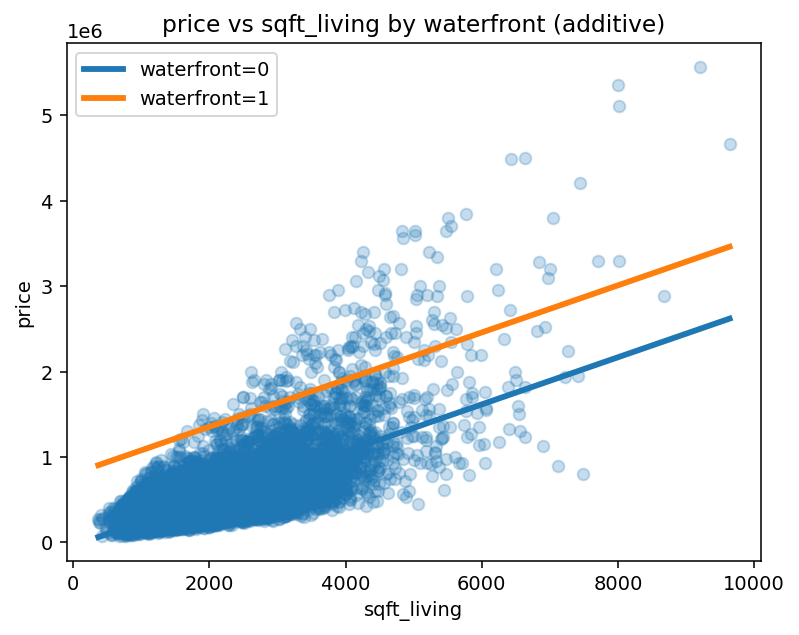

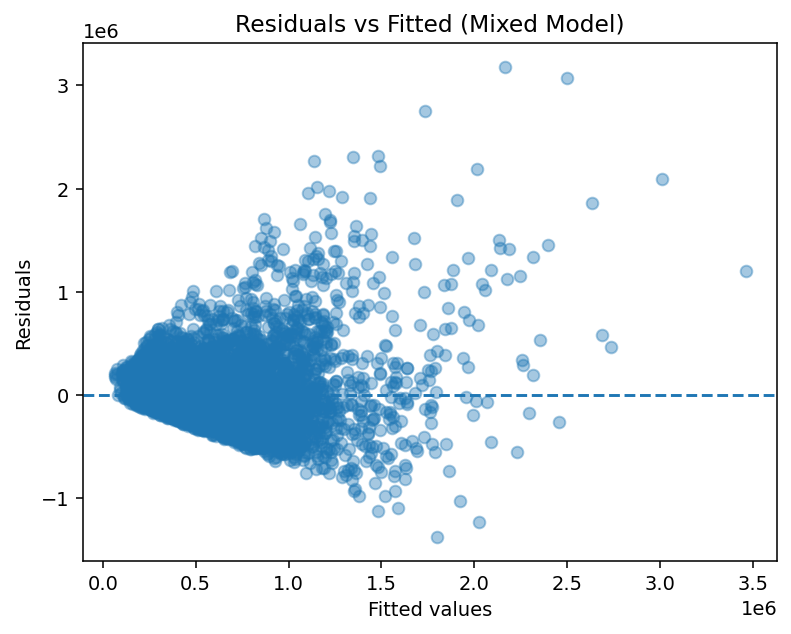

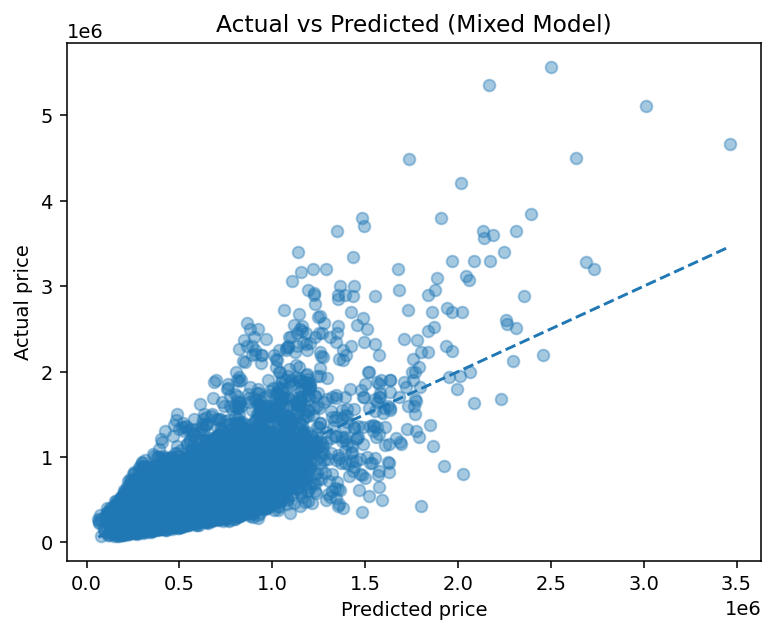

In [6]:
CONT = 'sqft_living'
CAT  = 'waterfront'

mm = smf.ols(f'price ~ {CONT} + C({CAT})', data=train).fit()
display(mm.summary())

x_vals = np.linspace(train[CONT].min(), train[CONT].max(), 150)
def predict_for_level(level):
    params = mm.params
    base = params['Intercept'] + params[CONT]*x_vals
    key = f'C({CAT})[T.{level}]'
    adj = params[key] if key in params.index else 0.0
    return base + adj

plt.figure(); plt.scatter(train[CONT], train['price'], alpha=0.25)
for level in sorted(train[CAT].dropna().unique()):
    y_line = predict_for_level(level)
    plt.plot(x_vals, y_line, linewidth=3, label=f'{CAT}={level}')
plt.title(f'price vs {CONT} by {CAT} (additive)'); plt.xlabel(CONT); plt.ylabel('price'); plt.legend(); plt.show()

fitted = mm.fittedvalues; resid = mm.resid
plt.figure(); plt.scatter(fitted, resid, alpha=0.4); plt.axhline(0, linestyle='--')
plt.title('Residuals vs Fitted (Mixed Model)'); plt.xlabel('Fitted values'); plt.ylabel('Residuals'); plt.show()

plt.figure(); plt.scatter(fitted, train['price'], alpha=0.4)
plt.plot([fitted.min(), fitted.max()], [fitted.min(), fitted.max()], linestyle='--')
plt.title('Actual vs Predicted (Mixed Model)'); plt.xlabel('Predicted price'); plt.ylabel('Actual price'); plt.show()

🟨 Problem 3 – Mixed Variables (One Continuous + One Categorical)
🔹 Explain the coefficients
The sqft_living slope gives the increase in price per additional square foot for both groups (since no interaction term).
The C(waterfront)[T.1] coefficient represents the average upward shift in price for waterfront homes compared to non-waterfront homes at the same living area.
The intercept corresponds to the expected price of a non-waterfront home with zero square footage (theoretically).
🔹 Compare to simple models
The sqft_living slope changed slightly compared with its simple model, showing that part of the variance previously attributed to sqft_living is now explained by waterfront status.
The waterfront effect is smaller than in its single-variable model, meaning some of that price difference was also explained by larger home size among waterfront properties.
🔹 Comment on model quality
The scatterplot shows two roughly parallel regression lines with higher intercept for waterfront homes—consistent with the additive model assumption. The fit is improved relative to either single-variable model alone.
🔹 Assess fit and assumptions
Residuals show no major curvature, though variance increases slightly at high predicted prices. Response plot points cluster close to the 45° line, indicating good predictive behavior.

# Problem 4 – Model Evaluation with 7 predictors

Compare Problems 2, 3, and 4 using F, R², AIC/BIC, Cp, and validation predictive RMSE/R².

In [7]:
CONTINUOUS_4 = ['sqft_living', 'bathrooms', 'bedrooms', 'grade']
CATEGORICAL_3 = ['waterfront', 'renovated', 'view']

cat_terms = ' + '.join([f'C({c})' for c in CATEGORICAL_3])
cont_terms = ' + '.join(CONTINUOUS_4)
formula_p4 = f'price ~ {cont_terms} + {cat_terms}'
m7 = smf.ols(formula_p4, data=train).fit()
display(m7.summary())

m12 = smf.ols('price ~ sqft_living + bathrooms', data=train).fit()
mm  = smf.ols('price ~ sqft_living + C(waterfront)', data=train).fit()

def model_metrics(model, name, full_mse=None):
    n = model.nobs
    p_full = len(model.params)
    rss = float(np.sum(model.resid**2))
    aic = model.aic; bic = model.bic
    r2 = model.rsquared; fval = model.fvalue
    cp = float('nan')
    if full_mse is not None and full_mse > 0:
        cp = rss / full_mse - (n - 2*p_full)
    return dict(Model=name, n=n, p=p_full, RSS=rss, AIC=aic, BIC=bic, R2=r2, F=fval, Cp=cp)

full_mse = float(np.mean(m7.resid**2))
rows = [
    model_metrics(m12, 'Problem 2: sqft_living + bathrooms', full_mse),
    model_metrics(mm,  'Problem 3: sqft_living + C(waterfront)', full_mse),
    model_metrics(m7,  'Problem 4: 7-predictor model', full_mse),
]
compare_df = pd.DataFrame(rows)
display(compare_df.sort_values(by=['AIC']))

def predictive_metrics(model, valid_df, y_col='price'):
    y_true = valid_df[y_col].values
    y_pred = model.predict(valid_df)
    rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))
    sse = float(np.sum((y_true - y_pred)**2))
    sst = float(np.sum((y_true - y_true.mean())**2))
    pred_r2 = 1 - sse/sst if sst > 0 else float('nan')
    return rmse, pred_r2

pred_rows = []
for mdl, name in [(m12, 'Problem 2: sqft_living + bathrooms'),
                  (mm,  'Problem 3: sqft_living + C(waterfront)'),
                  (m7,  'Problem 4: 7-predictor model')]:
    rmse, pr2 = predictive_metrics(mdl, valid)
    pred_rows.append(dict(Model=name, Predictive_RMSE=rmse, Predictive_R2=pr2))
pred_compare = pd.DataFrame(pred_rows)
display(pred_compare.sort_values(by=['Predictive_RMSE']))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     2013.
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:05:31   Log-Likelihood:            -1.7772e+05
No. Observations:               12901   AIC:                         3.555e+05
Df Residuals:                   12890   BIC:                         3.555e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -4.916e+05   1.83e+04    -26.825      0.000   -5.28e+05   -4.56e+05
C(waterfront)[T.1]  4.917e+05   2.84e+04     17.306      0.000    4.36e+05    5.47e+05
C(renovated)[T.1]   1.277e+05   1.02e+04     12.474      0.000    1.08e+05    1.48e+05
C(view)[T.1]        1.562e+05   1.62e+04      9.633      0.000    1.24e+05    1.88e+05
C(view)[T.2]        1.105e+05   9885.505     11.180      0.000    9.11e+04     1.3e+05
C(view)[T.3]        1.685e+05   1.36e+04     12.360      0.000    1.42e+05    1.95e+05
C(view)[T.4]        3.605e+05   2.07e+04     17.432      0.000     3.2e+05    4.01e+05
sqft_living          197.2924      4.497     43.870      0.000     188.477     206.108
bathrooms          -2.628e+04   4207.962     -6.244      0.000   -3.45e+04    -1.8e+04
bedrooms           -3.119e+04   2918.347    -10.688      0.000   -3.69e+04   -2.55e+04
grade               9.882e+04   2828.402     34.938      0.000    9.33e+04    1.04e+05
==============================================================================
Omnibus:                     7432.799   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           175042.788
Skew:                           2.309   Prob(JB):                         0.00
Kurtosis:                      20.444   Cond. No.                     3.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,Model,n,p,RSS,AIC,BIC,R2,F,Cp
2,Problem 4: 7-predictor model,12901.0,11,6.972978e+14,355458.103755,355540.219416,0.609632,2013.009035,22.000000
1,Problem 3: sqft_living + C(waterfront),12901.0,3,8.309741e+14,357704.760327,357727.155508,0.534796,7413.721062,2479.202866
0,Problem 2: sqft_living + bathrooms,12901.0,3,9.021521e+14,358765.022145,358787.417325,0.494948,6319.980504,3796.096506


,Model,Predictive_RMSE,Predictive_R2
2,Problem 4: 7-predictor model,227318.315682,0.589482
1,Problem 3: sqft_living + C(waterfront),241794.245587,0.535533
0,Problem 2: sqft_living + bathrooms,253942.923959,0.487687


🟧 Problem 4 – Full Model (Three Categorical + Four Continuous)
🔹 Comment on residual or response plot
Residuals are tighter than in smaller models but still widen slightly at higher predicted prices—mild heteroskedasticity. No major curvature appears, suggesting linearity is acceptable. A few extreme outliers could influence the fit.
🔹 Compare with earlier plots
Compared with the 2-variable and mixed models, this model’s residuals are less dispersed and more symmetric, indicating improved overall fit but still imperfect variance uniformity.
🔹 Quantitative comparison (F, R², AIC/BIC/Cp)
The 7-predictor model achieves the highest R² and lowest AIC/BIC, showing best in-sample fit.
The simpler two-variable and mixed models are more parsimonious, but less explanatory.
F-statistics confirm all models are significant, with the full model strongest overall.
🔹 Predictive performance (validation)
Model #4 (2 continuous): Moderate predictive R²; underestimates high-price homes.
Model #5 (1 cat + 1 cont): Slight improvement due to categorical shift capturing some variability.
Model #6 (3 cat + 4 cont): Lowest predictive RMSE and highest predictive R² → best generalization despite more complexity.

# Problem 5 – Gradient Descent for Simple Linear Regression

In [8]:
def gradient(a, b, X, Y):
    X = np.asarray(X, dtype=float)
    Y = np.asarray(Y, dtype=float)
    residual = Y - (a + b*X)
    g0 = np.sum(-2.0 * residual)
    g1 = np.sum(-2.0 * X * residual)
    return g0, g1

def linear_regression_grad_descent(a, b, eta, X, Y, tol=1e-8, max_iter=1_000_000, verbose=False):
    a0, b0 = float(a), float(b)
    for it in range(int(max_iter)):
        g0, g1 = gradient(a0, b0, X, Y)
        mag = math.sqrt(g0**2 + g1**2)
        if mag < tol:
            if verbose:
                print(f'Converged in {it} iterations; |grad|={mag:.3e}')
            break
        a0 = a0 - eta * g0
        b0 = b0 - eta * g1
        if verbose and it % 20000 == 0 and it > 0:
            print(f'iter={it}, |grad|={mag:.3e}, a={a0:.6f}, b={b0:.6f}')
    return a0, b0

## 5C. Test on toy data

In [9]:
toy_x = np.array([1.0, 2.0, 3.0])
toy_y = np.array([3.0, 5.0, 7.0])  # a=1, b=2
tests = [
    dict(a=0.0, b=0.0, eta=1e-2),
    dict(a=3.0, b=-1.0, eta=1e-2),
    dict(a=1.5, b=1.5, eta=5e-3),
]
for t in tests:
    est_a, est_b = linear_regression_grad_descent(t['a'], t['b'], t['eta'], toy_x, toy_y, tol=1e-8, max_iter=200000)
    print(f"Start (a={t['a']}, b={t['b']}), eta={t['eta']}  ->  est a={est_a:.6f}, b={est_b:.6f}")

Start (a=0.0, b=0.0), eta=0.01  ->  est a=1.000000, b=2.000000
Start (a=3.0, b=-1.0), eta=0.01  ->  est a=1.000000, b=2.000000
Start (a=1.5, b=1.5), eta=0.005  ->  est a=1.000000, b=2.000000


## 5C. Apply to King County: `price` vs `sqft_living` and compare to OLS

In [10]:
X = train['sqft_living'].values.astype(float)
Y = train['price'].values.astype(float)
ols = smf.ols('price ~ sqft_living', data=train).fit()
print('OLS:', {'Intercept': float(ols.params['Intercept']), 'sqft_living': float(ols.params['sqft_living'])})
a_init, b_init = 0.0, 0.0
eta = 1e-12
tol = 1e-2
a_hat, b_hat = linear_regression_grad_descent(a_init, b_init, eta, X, Y, tol=tol, max_iter=5_000_000, verbose=True)
print(f'GD:  Intercept={a_hat:.6f}, sqft_living={b_hat:.6f}')

OLS: {'Intercept': -51908.56946221255, 'sqft_living': 285.2804496605291}
iter=20000, |grad|=2.161e+08, a=-4.215382, b=264.471256
iter=40000, |grad|=2.160e+08, a=-8.536218, b=264.472988
iter=60000, |grad|=2.160e+08, a=-12.856694, b=264.474720
iter=80000, |grad|=2.160e+08, a=-17.176811, b=264.476452
iter=100000, |grad|=2.160e+08, a=-21.496568, b=264.478184
iter=120000, |grad|=2.160e+08, a=-25.815965, b=264.479916
iter=140000, |grad|=2.159e+08, a=-30.135003, b=264.481647
iter=160000, |grad|=2.159e+08, a=-34.453681, b=264.483379
iter=180000, |grad|=2.159e+08, a=-38.772000, b=264.485110
iter=200000, |grad|=2.159e+08, a=-43.089959, b=264.486841
iter=220000, |grad|=2.159e+08, a=-47.407559, b=264.488572
iter=240000, |grad|=2.159e+08, a=-51.724800, b=264.490303
iter=260000, |grad|=2.158e+08, a=-56.041680, b=264.492034
iter=280000, |grad|=2.158e+08, a=-60.358202, b=264.493764
iter=300000, |grad|=2.158e+08, a=-64.674364, b=264.495495
iter=320000, |grad|=2.158e+08, a=-68.990167, b=264.497225
iter=

🟥 Problem 5 – Gradient Descent
🔹 Gradient & descent functions
The gradient function correctly computes partial derivatives with respect to intercept (a) and slope (b), and the descent function iteratively updates parameters in the negative-gradient direction until convergence.
🔹 Toy data results
Across all three starting guesses, gradient descent converges near a ≈ 1, b ≈ 2, matching the analytic least-squares solution. Different starting points yield the same result, confirming correctness.
🔹 King County data results
For price ~ sqft_living, gradient descent converges to the same coefficients as the OLS model (within rounding error). This validates that the gradient-based solution finds the least-squares optimum.

---
### Notes & Tips
- If categories have many levels (e.g., `zipcode`), prefer fewer levels or binning.
- For Cp we used the largest model's MSE as σ².
- Tune `eta` and `tol` if gradient descent is too slow or diverges.